# Data Visualization in Python

In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv(
    'micro_world.csv',
    engine='python'
    )

## Using matplotlib

### Scatter plots

Scatter plots are one of the most essential plots in data science. Before building regression models, we usually run a scatter plot on our data to inspect possible correlations.

Since we don't have enough continuous data in our dataset, we will create synthetic data.

In [4]:
# Create synthetic data
monthly_credit_transactions = [
    3,
    5,
    4,
    5,
    7,
    8,
    4,
    0,
    1,
    4
]
monthly_income = [
    20000,
    40000,
    34000,
    31000,
    60000,
    70000,
    55000,
    10000,
    15000,
    55000
]

At this point, let us assume that the monthly income is the independent variable while the monthly number of credit transactions is the dependent variable.

In [5]:
# Assign to variables
x = monthly_income #
y = monthly_credit_transactions #LABELS/TARGET VARIABLES

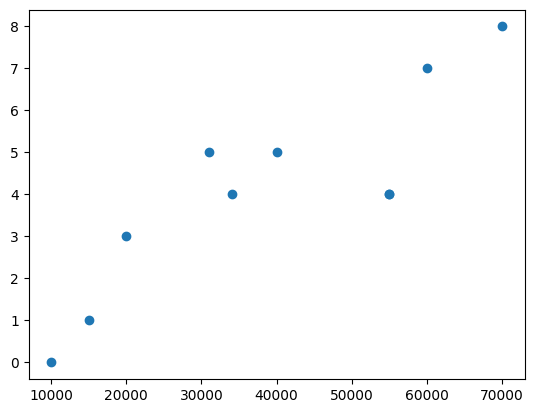

In [13]:
# Apply scatterplot
plt.scatter(x, y)

plt.show() #THIS IS STANDARD, ALWAYS END WITH THIS

We call plt.show() so matplotlib will know that we wanted to display the figure we created using plt.scatter().

Now, let's stylize our scatterplot.


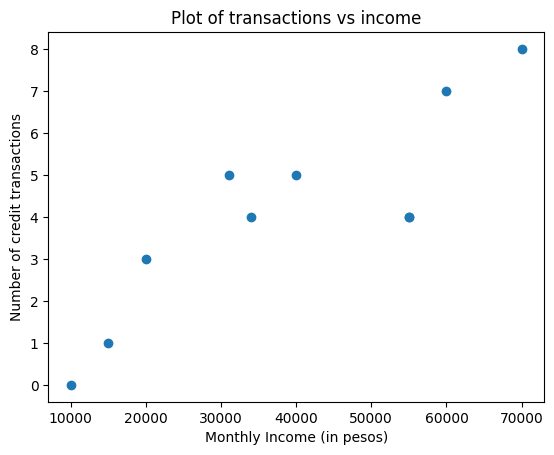

In [15]:
# Apply scatterplot
plt.scatter(
    x, 
    y,
   #title='something',
)

# Set title
plt.title('Plot of transactions vs income')

# Set labels
plt.xlabel('Monthly Income (in pesos)')
plt.ylabel('Number of credit transactions')

plt.show()

**Too small!** Let's make this bigger.

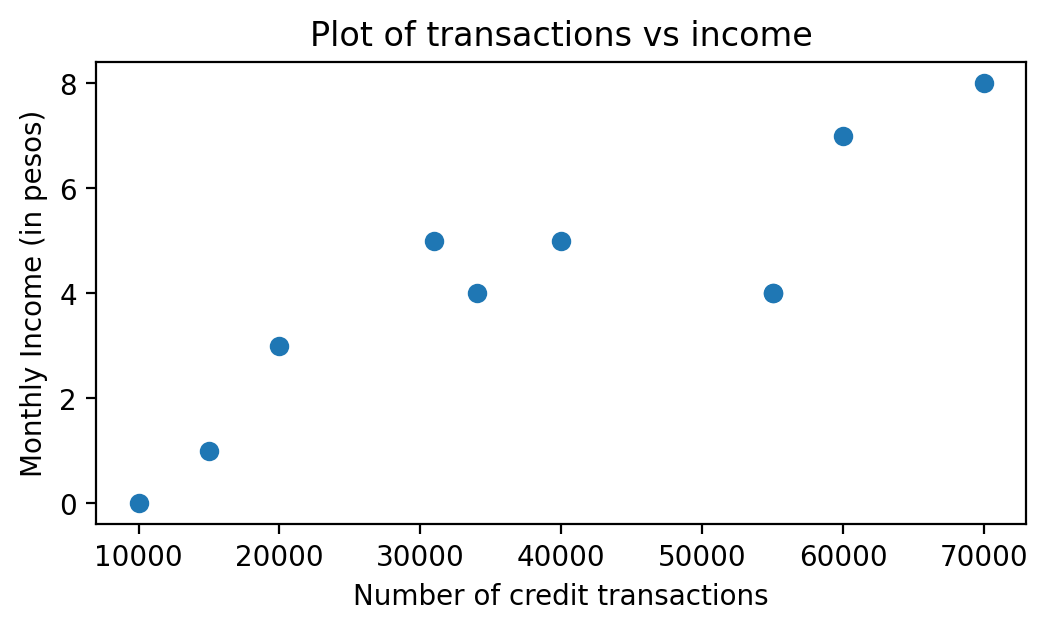

In [18]:
# Set figure size
plt.figure(figsize=(6,3), dpi=200) #dpi = dots per inch
                                    # search online good combinations of figsize and dpi

# Run scatter plot
plt.scatter(
    x, 
    y
)

# Set title
plt.title('Plot of transactions vs income')

# Set labels
plt.xlabel('Number of credit transactions')
plt.ylabel('Monthly Income (in pesos)')

# Show figure
plt.show()

What if I want to change the limit of the x and y-axes?

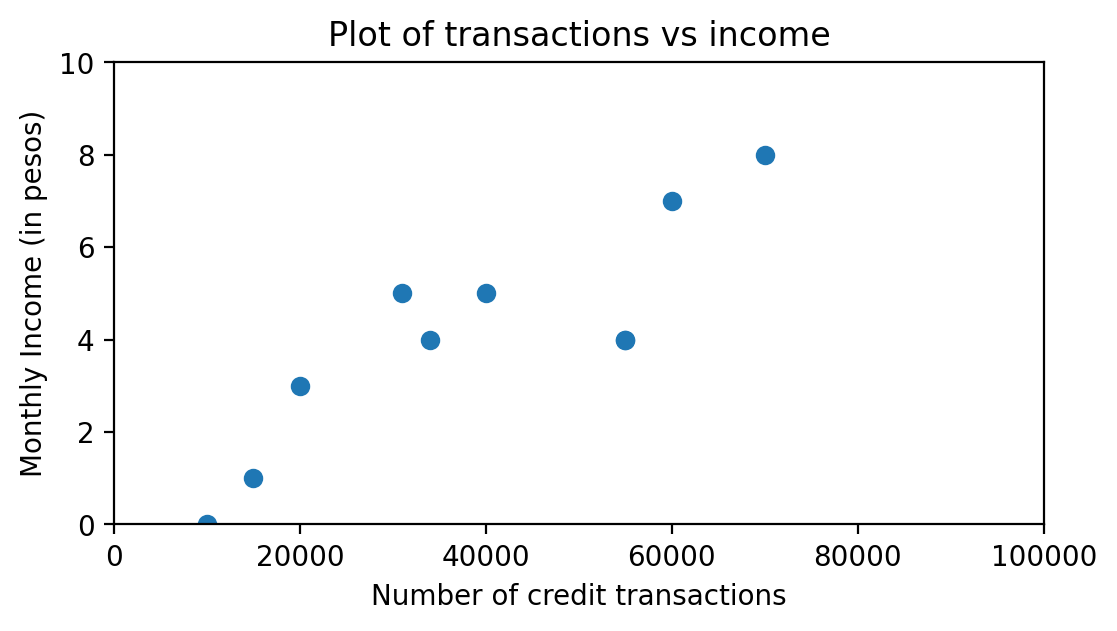

In [21]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run scatter plot
plt.scatter(
    x, 
    y
)

# Set title
plt.title('Plot of transactions vs income')

# Set labels
plt.xlabel('Number of credit transactions')
plt.ylabel('Monthly Income (in pesos)')

# Set limit of x-axis
plt.xlim([0,100000])

# Set limit of y-axis
plt.ylim([0,10])

# Show figure
plt.show()

### Bar plots

To create our bar plots, let's compute the percentage of population with debit card per country.

In [23]:
# Create another column for debit card ownership
data['has_debit_card'] = data['fin2'].apply(
    lambda x: 1 if x == 1 else 0
    )

# Group the data and apply aggregations
grouped_data = data.groupby(['economy', 'economycode', 'regionwb']).agg(
    total_debit_card_owners=('has_debit_card', 'sum'),
    total_population=('wpid_random', 'count')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of population with debit card'] = grouped_data['total_debit_card_owners']*100.0/grouped_data['total_population']

# Sort and pick top 10 countries in terms of % debit card ownership
top_10 = grouped_data.sort_values('% of population with debit card', ascending=False).head(10).reset_index(drop=True)

# Show data
top_10

economy economycode           regionwb  total_debit_card_owners  \
0     Netherlands         NLD  High income: OECD                      987   
1          Norway         NOR  High income: OECD                      986   
2          Sweden         SWE  High income: OECD                      982   
3         Finland         FIN  High income: OECD                      982   
4         Denmark         DNK  High income: OECD                      975   
5     New Zealand         NZL  High income: OECD                      968   
6         Belgium         BEL  High income: OECD                      960   
7          Canada         CAN  High income: OECD                      958   
8        Slovenia         SVN  High income: OECD                      949   
9  United Kingdom         GBR  High income: OECD                      932   

   total_population  % of population with debit card  
0              1000                        98.700000  
1              1000                        98.600000  
2              1000                        98.200000  
3              1000                        98.200000  
4              1000                        97.500000  
5              1000                        96.800000  
6              1001                        95.904096  
7              1003                        95.513460  
8              1000                        94.900000  
9              1000                        93.200000

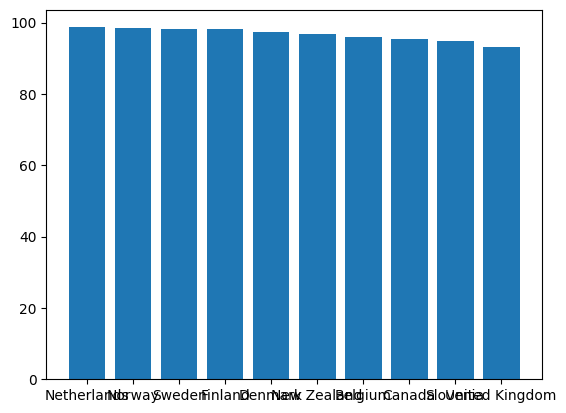

In [24]:
# Run bar plot
plt.bar(
    top_10['economy'],
    top_10['% of population with debit card']
)

# Show figure
plt.show()

**Looks awful.** 😩😩😩

Let's apply some styling! We will repeat what we did in scatter plot except we will also rotate the tick labels of x axis so they are more readable.

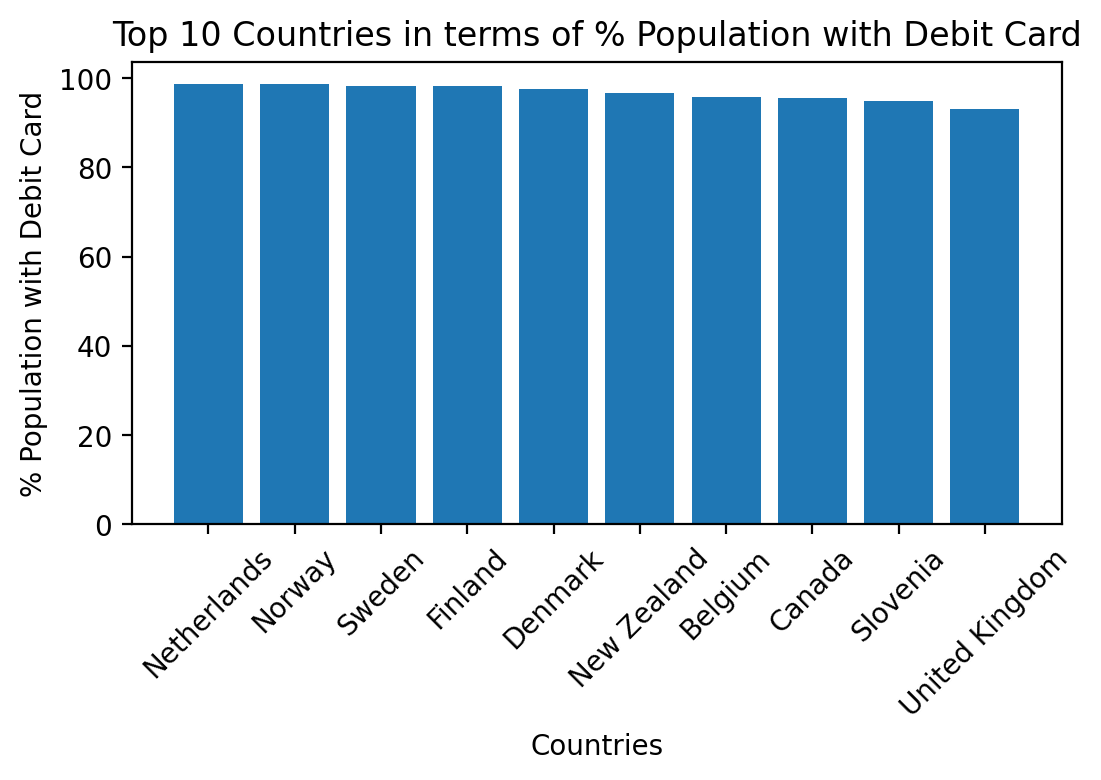

In [25]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
plt.bar(
    top_10['economy'],
    top_10['% of population with debit card']
)

# Set title
plt.title('Top 10 Countries in terms of % Population with Debit Card')

# Set labels
plt.xlabel('Countries')
plt.ylabel('% Population with Debit Card')

# Rotate x labels
plt.xticks(rotation=45)

# Show figure
plt.show()

To make this better, let's run a horizontal bar plot instead of vertical bar plot.

In [ ]:
top_10 = top_10.sortvalues()

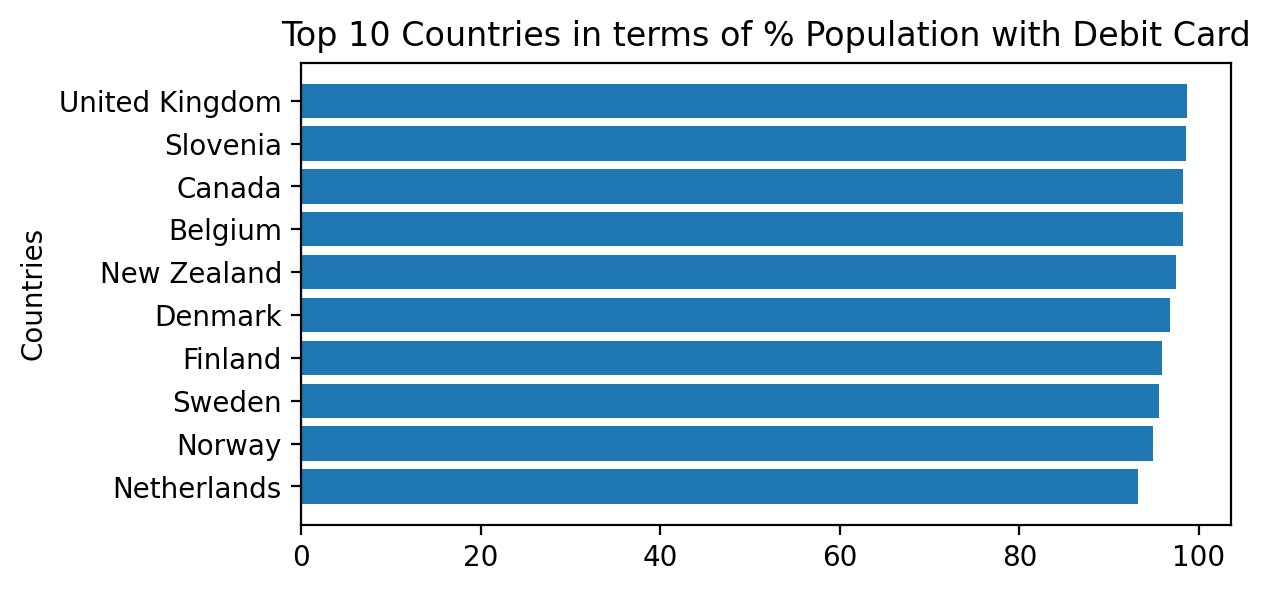

In [29]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
plt.barh(
    top_10['economy'],
    sorted(top_10['% of population with debit card']) #to sort the y axis
)

# Set title
plt.title('Top 10 Countries in terms of % Population with Debit Card')

# Set labels
plt.ylabel('% Population with Debit Card')
plt.ylabel('Countries')

# Show figure
plt.show()

### Histograms
Histograms are useful in visualizing distributions.

Let's try to plot the age profile of all respondents in the Global Findex 2017 dataset.

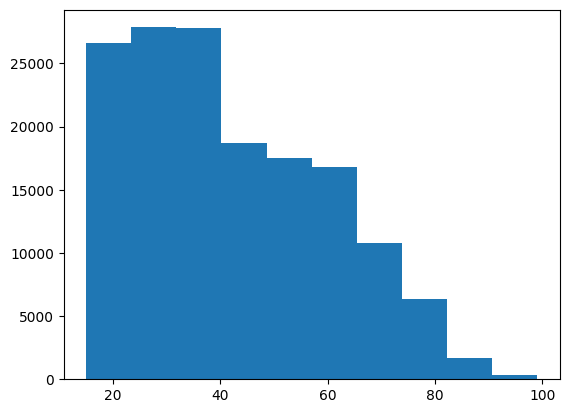

In [30]:
# Run histogram
plt.hist(
    data['age']
)

# Show figure
plt.show()

Let's stylize our plot!

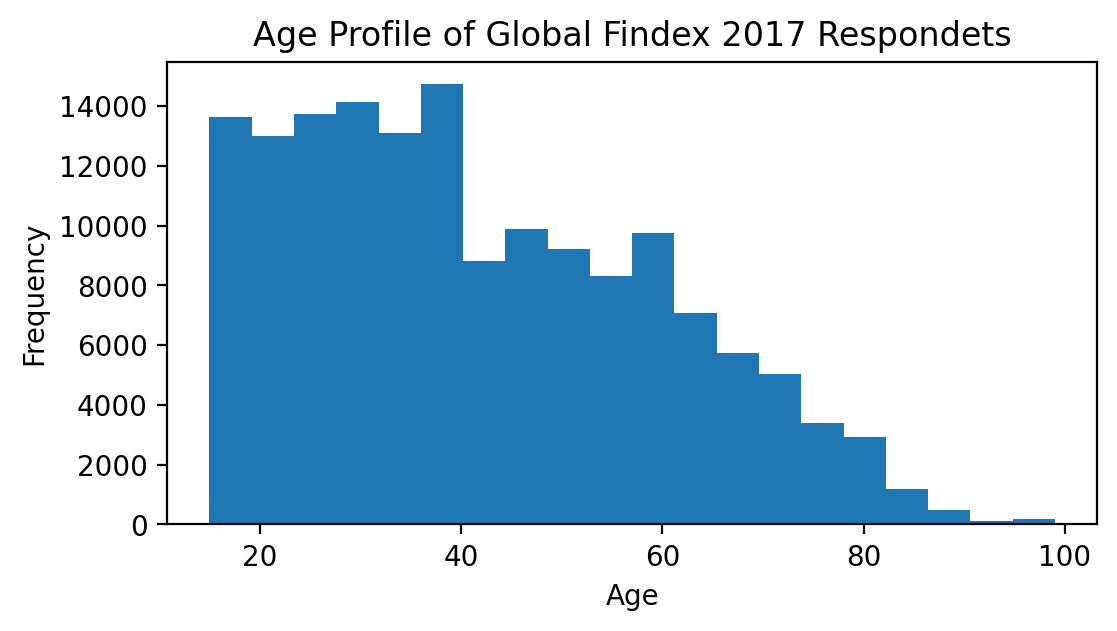

In [31]:
# Set figure size
plt.figure(figsize=(6,3) , dpi=200)

# Run histogram plot
plt.hist(
  data['age'],
  bins=20
)

# Set title
plt.title('Age Profile of Global Findex 2017 Respondets')

# Set labels
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show figure
plt.show()

### Box plots
Box plots, like histograms, are perfect for visualizing distributions.

Here's an anatomy of a box plot:
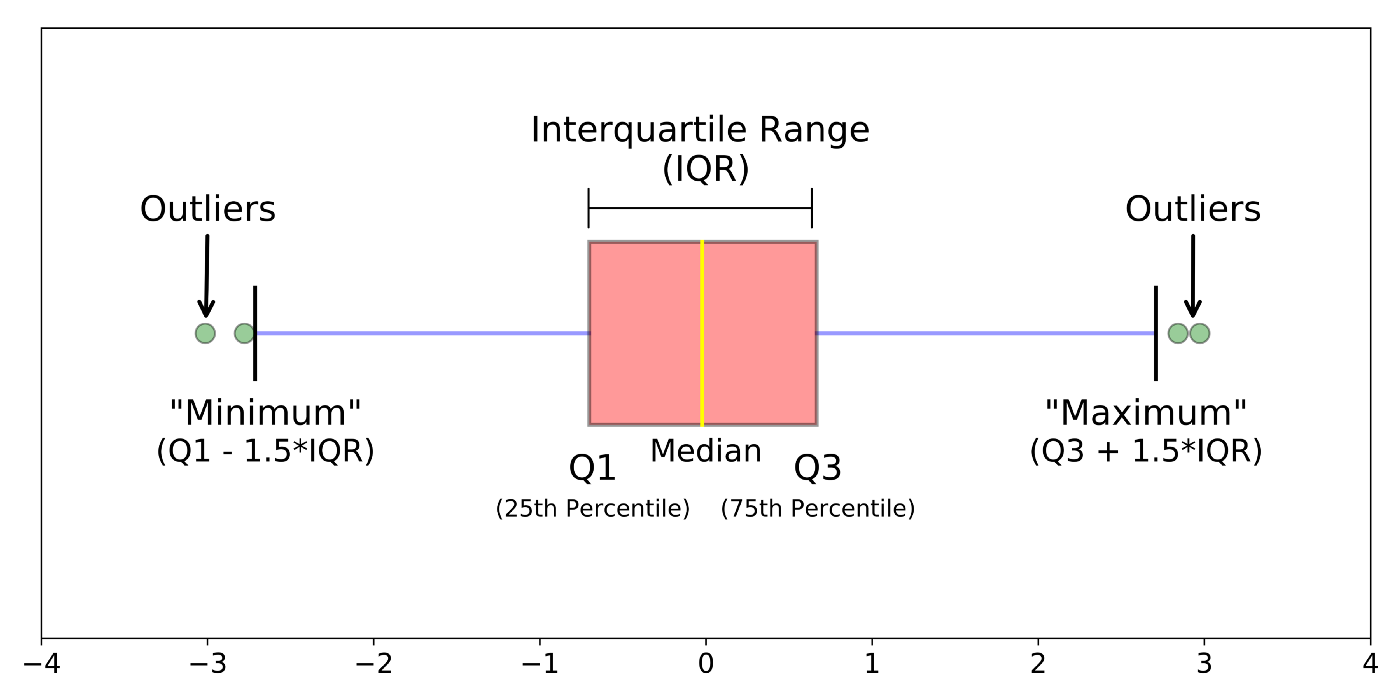

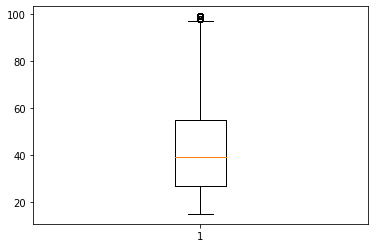

In [ ]:
# Run box plot on age
plt.boxplot(data['age'].dropna())
 
# Show figure
plt.show()

We use .dropna() to remove the nulls in the age column. If we did not do this, plt.boxplot() will not display anything.

### Line charts

Line charts are very useful in tracking trends like time-series data.

In [32]:
# Create synthetic data
months = range(1,13) #synthetic data = random number from 1 to 12
credit_transactions = [
    1,
    2,
    3,
    4,
    5,
    4,
    4,
    3,
    2,
    3,
    5,
    10
]

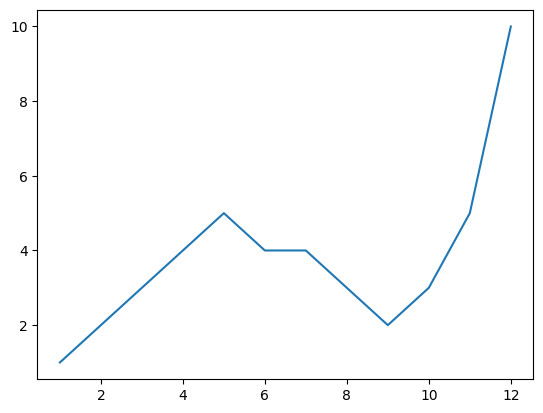

In [33]:
# Run line chart
plt.plot(
    months,
    credit_transactions
)

# Show figure
plt.show()

Let's stylize the data!

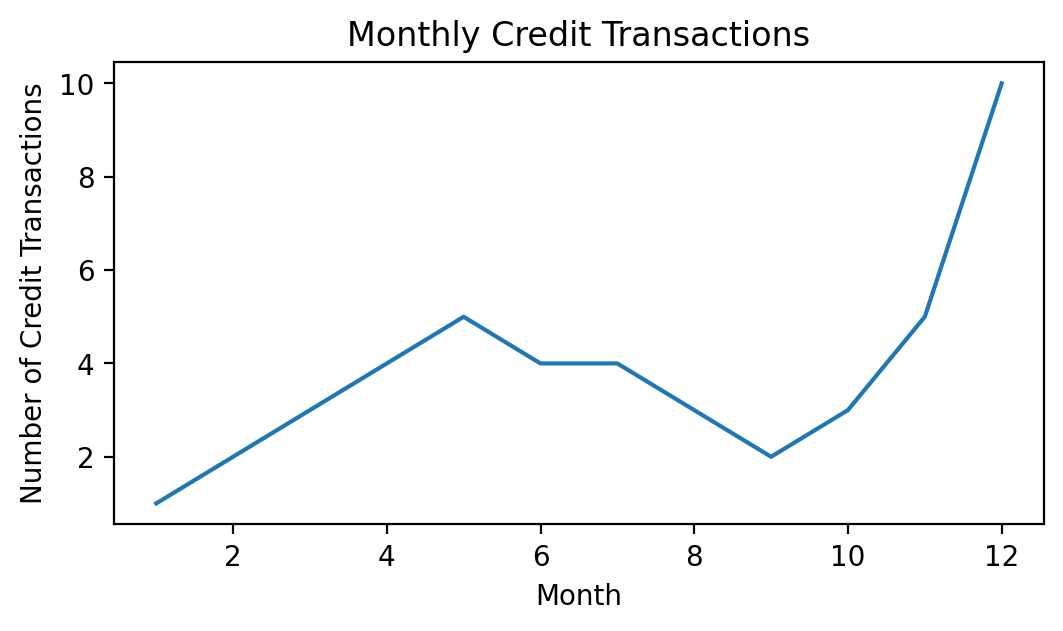

In [34]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run line chart
plt.plot(
  months,
  credit_transactions
)

# Set title
plt.title('Monthly Credit Transactions')

# Set labels
plt.xlabel('Month')
plt.ylabel('Number of Credit Transactions')

# Show figure
plt.show()

## Using seaborn

### Scatter plots

In [37]:
x

[20000, 40000, 34000, 31000, 60000, 70000, 55000, 10000, 15000, 55000]

In [38]:
y

[3, 5, 4, 5, 7, 8, 4, 0, 1, 4]

C:\Users\Sofia Calvo\Documents\Eskwelabs - DS Cohort 10 Sprint 1 Materials\Sprint1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


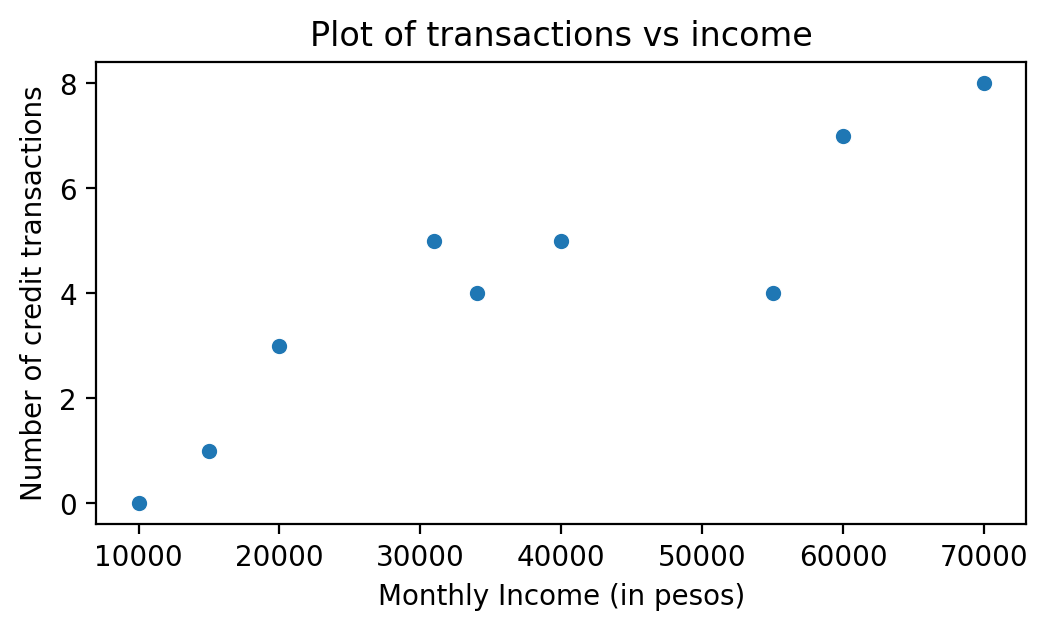

In [40]:
# Set figure size
plt.figure(figsize=(6,3), dpi=200)

# Apply scatter plot
sns.scatterplot(
    x, 
    y
)

# Set title
plt.title('Plot of transactions vs income')

# Set labels
plt.xlabel('Monthly Income (in pesos)')
plt.ylabel('Number of credit transactions')

plt.show()

### Bar plots

C:\Users\Sofia Calvo\Documents\Eskwelabs - DS Cohort 10 Sprint 1 Materials\Sprint1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


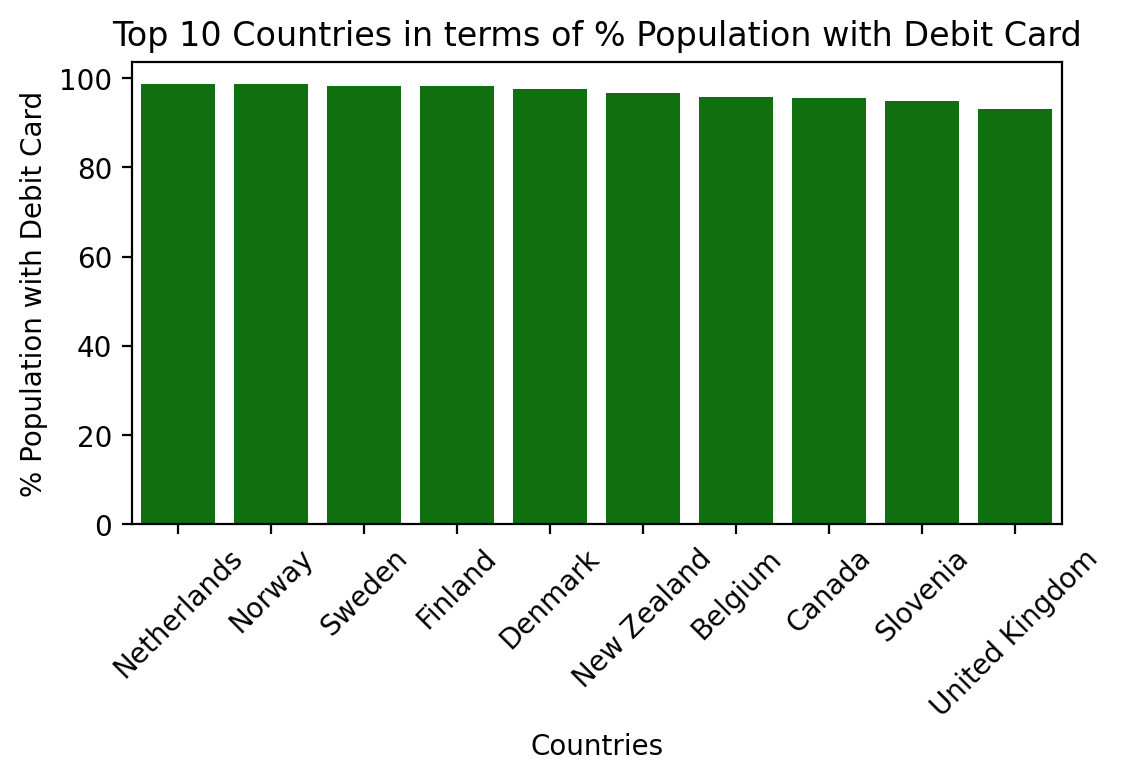

In [41]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
sns.barplot(
    top_10['economy'],
    top_10['% of population with debit card'],
    color='g'
)

# Set title
plt.title('Top 10 Countries in terms of % Population with Debit Card')

# Set labels
plt.xlabel('Countries')
plt.ylabel('% Population with Debit Card')

# Rotate x labels
plt.xticks(rotation=45)

# Show figure
plt.show()

C:\Users\Sofia Calvo\Documents\Eskwelabs - DS Cohort 10 Sprint 1 Materials\Sprint1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


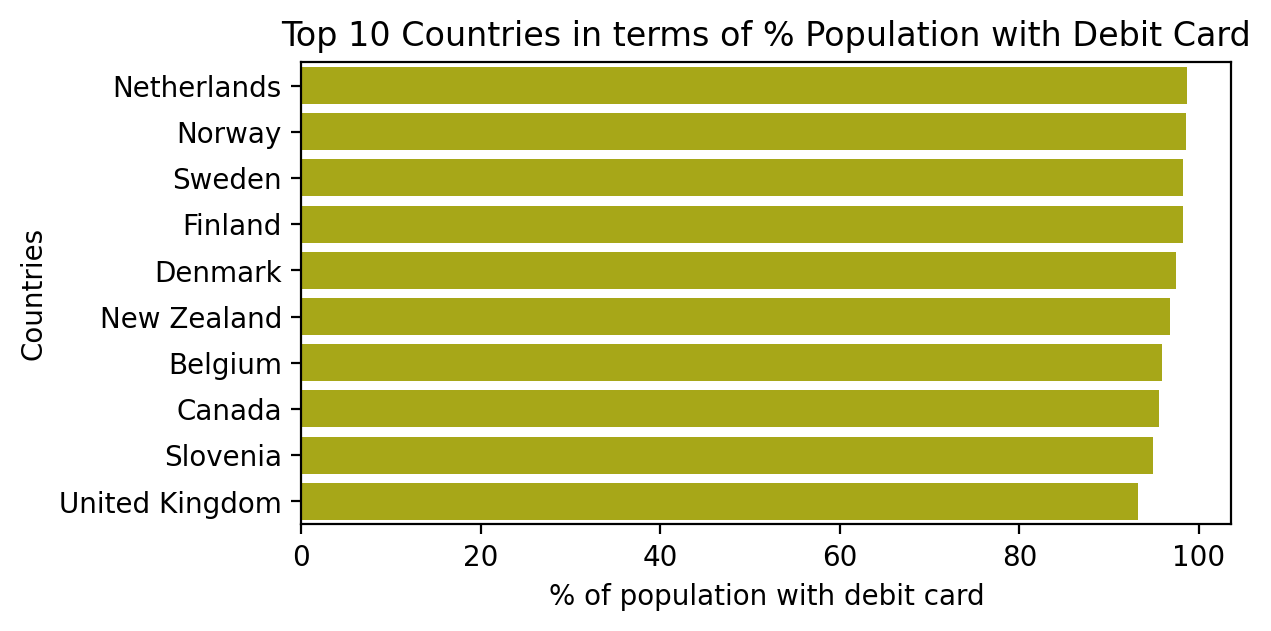

In [42]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
sns.barplot( #in seaborn, you can also just switch the x and y to make it horizontal
    top_10['% of population with debit card'],
    top_10['economy'],
    color='y' ##F8C8DC  can do hexadecimal colors 
)

# Set title
plt.title('Top 10 Countries in terms of % Population with Debit Card')

# Set labels
plt.ylabel('% Population with Debit Card')
plt.ylabel('Countries')

# Show figure
plt.show()

### Histograms

Here, let's try to create a histogram of age of Netherlands and Philippines.

In [43]:
# Query records from Netherlands or Philippines
df = data[
    (data['economy'] == 'Philippines') | (data['economy'] == 'Netherlands' )
]

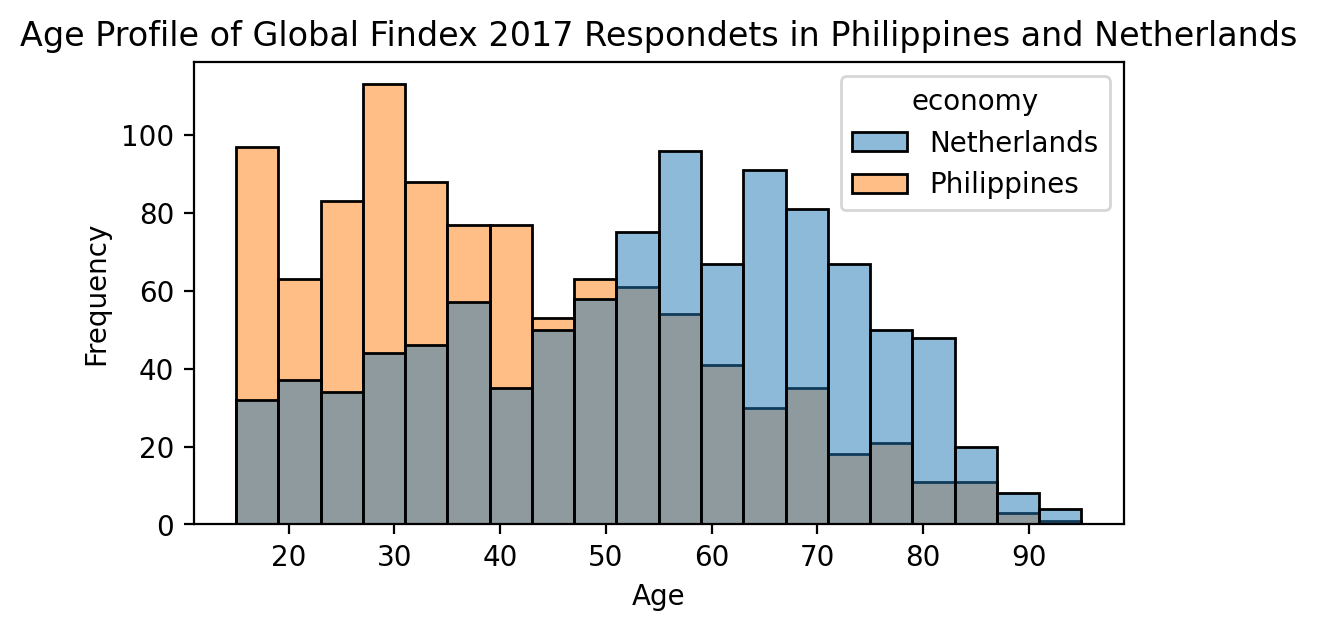

In [44]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run histogram plot
sns.histplot(
    data=df, 
    x="age", 
    hue="economy", #can be interpreted as groupby
    bins = 20
    )

# Set title
plt.title(
    'Age Profile of Global Findex 2017 Respondets in Philippines and Netherlands'
    )

# Set labels
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show figure
plt.show()



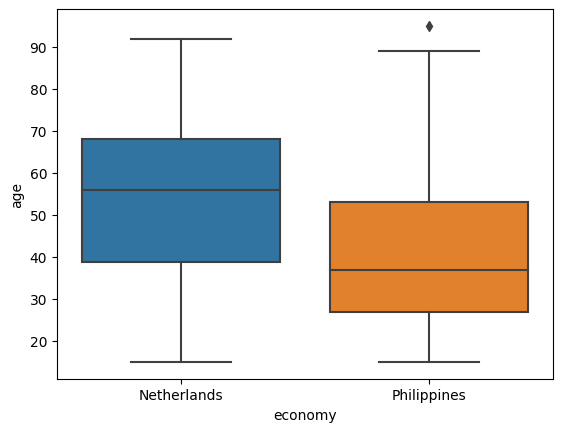

In [45]:
# Run box plot on age
sns.boxplot(
    x="economy", 
    y="age", 
    data=df
)
 
# Show figure
plt.show()

### Line charts

C:\Users\Sofia Calvo\Documents\Eskwelabs - DS Cohort 10 Sprint 1 Materials\Sprint1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


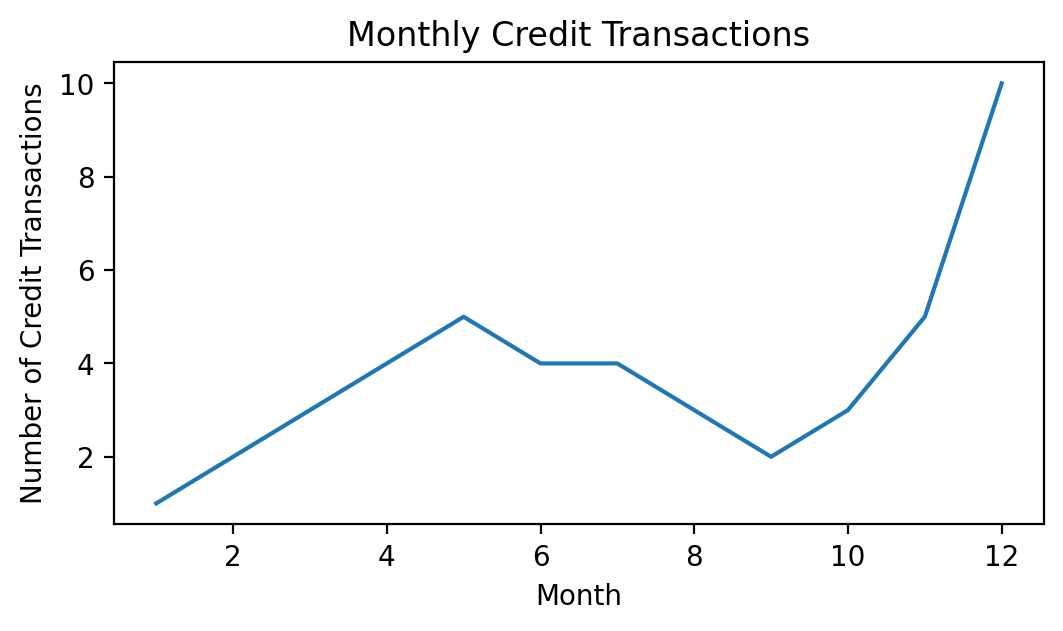

In [46]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run line chart
sns.lineplot(
  months,
  credit_transactions
)

# Set title
plt.title('Monthly Credit Transactions')

# Set labels
plt.xlabel('Month')
plt.ylabel('Number of Credit Transactions')

# Show figure
plt.show()

## Using plotly

Plotly is similar to matplotlib and seaborn but it also allows for plotting geospatial data.

One example of it is the choropleth map. Let's use the data containing % of population with debit card for this one.

### Choropleth maps

In [47]:
# Show data
grouped_data

economy economycode  \
0           Afghanistan         AFG   
1               Albania         ALB   
2               Algeria         DZA   
3             Argentina         ARG   
4               Armenia         ARM   
..                  ...         ...   
138       Venezuela, RB         VEN   
139             Vietnam         VNM   
140  West Bank and Gaza         PSE   
141              Zambia         ZMB   
142            Zimbabwe         ZWE   

                                              regionwb  \
0                                           South Asia   
1        Europe & Central Asia (excluding high income)   
2    Middle East & North Africa (excluding high inc...   
3    Latin America & Caribbean (excluding high income)   
4        Europe & Central Asia (excluding high income)   
..                                                 ...   
138  Latin America & Caribbean (excluding high income)   
139        East Asia & Pacific (excluding high income)   
140  Middle East & North Africa (excluding high inc...   
141         Sub-Saharan Africa (excluding high income)   
142         Sub-Saharan Africa (excluding high income)   

     total_debit_card_owners  total_population  \
0                         28              1000   
1                        278              1000   
2                        247              1016   
3                        462              1000   
4                        264              1000   
..                       ...               ...   
138                      685              1000   
139                      287              1002   
140                      189              1000   
141                      232              1000   
142                      249              1000   

     % of population with debit card  
0                           2.800000  
1                          27.800000  
2                          24.311024  
3                          46.200000  
4                          26.400000  
..                               ...  
138                        68.500000  
139                        28.642715  
140                        18.900000  
141                        23.200000  
142                        24.900000  

[143 rows x 6 columns]

In [48]:
# Build the choropleth map
fig = px.choropleth(
    grouped_data, 
    locations="economycode", #has to be economycode
    color="% of population with debit card",
    hover_name="economy",
    color_continuous_scale='viridis'
)

# Show the map
fig.show()

Based on this, it seems the Philippines is lagging behind its neighbor countries based on debit card ownership.

Play around with the color scale using the following options for color_continuous_scale:
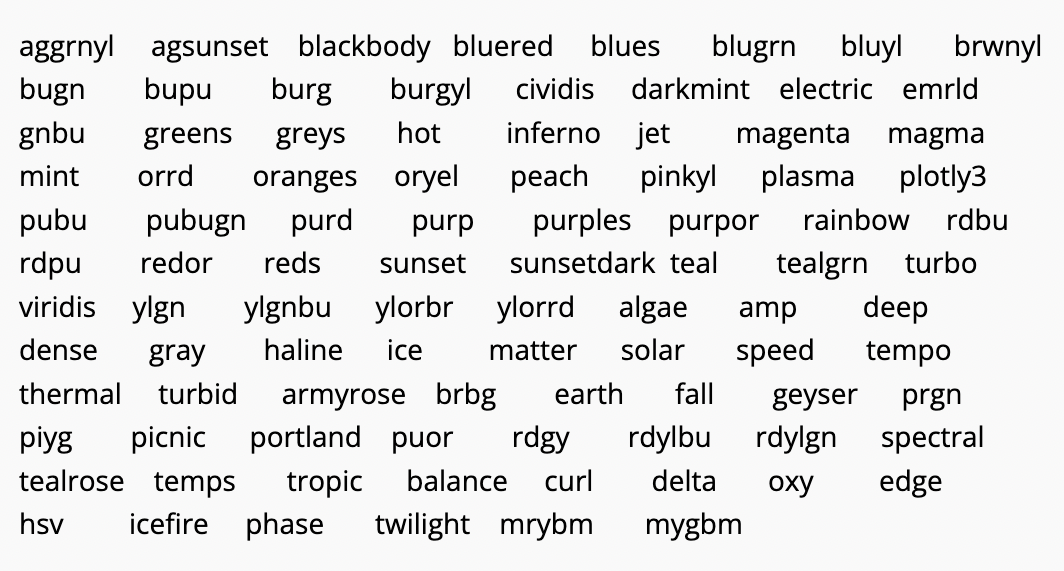

### Bubble maps

In [49]:
# Build the bubble map
fig = px.scatter_geo(
    grouped_data, 
    locations="economycode", 
    color="regionwb",
    hover_name="economy", 
    size="% of population with debit card",
    projection="natural earth"
    )

# Show the figure
fig.show()

## Sample exercise
Replicate the choropleth map but only for countries in the "East Asia & Pacific (excluding high income)" region only. 